In [1]:
from pathlib import Path

notebook_path = Path().cwd().parent.parent.parent.parent
import sys

sys.path.insert(0, str(notebook_path))

import pandas as pd

from explore.gcp.storage import gcp
from explore.src.utilities.eda_funcs import describe_data
from explore.src.visualisation.exploratory_visuals import StatisticPlots
from explore.src.visualisation.wages_visual import WagesVisuals

import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [2]:
df = gcp.read_df_from_bucket(
    bucket_name="processed_fbref_db", blob_name="processed_Ligue-1-wages.csv"
)

[03/21/24 18:57:34] INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:28 ] - Getting GCP bucket                                 ]8;id=469464;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=493143;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#28\28]8;;\

                    INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:33 ] - GCP bucket retrieved                               ]8;id=51317;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=108511;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#33\33]8;;\

In [3]:
df.head()

,rk,player,nation,pos,squad,age,weekly_wages_euros,annual_wages_euros,notes,season,general_pos,age_range,country,continent,player_id
0,1,Neymar,BRA,FW,Paris S-G,25,832692,43300000,Unverified estimation,2017-2018,Forward,25-29,Brazil,South America,1715.0
1,2,Edinson Cavani,URU,FW,Paris S-G,30,350769,18240000,Unverified estimation,2017-2018,Forward,30-34,Uruguay,South America,451.0
2,3,Kylian Mbappé,FRA,"FW,MF",Monaco,18,341731,17770000,Unverified estimation,2017-2018,Forward,Under 20,France,Europe,1536.0
3,4,Lassana Diarra,FRA,MF,Paris S-G,32,330192,17170000,Unverified estimation,2017-2018,Midfielder,30-34,France,Europe,641.0
4,5,Thiago Silva,BRA,DF,Paris S-G,32,303077,15760000,Unverified estimation,2017-2018,Defender,30-34,Brazil,South America,2203.0


In [4]:
df.shape

(4074, 15)

In [5]:
describe_data(df)

,Data Types,Null Counts,Null %,Unique Values,Min,Max,Median,Mean,Std Dev,Outliers,Outliers %
rk,int64,0,0.00,657,1.0,657.0,291.5,294.12,172.32,0,0.00
age,int64,0,0.00,28,15.0,42.0,24.0,24.42,4.67,13,0.32
weekly_wages_euros,int64,0,0.00,695,1.0,1384615.0,8846.0,23255.91,67635.10,469,11.51
annual_wages_euros,int64,0,0.00,695,42.0,72000000.0,460000.0,1209306.86,3517025.71,469,11.51
player_id,float64,392,9.62,1510,4.0,6295.0,2613.0,2703.78,1630.92,0,0.00


In [6]:
df.head()

,rk,player,nation,pos,squad,age,weekly_wages_euros,annual_wages_euros,notes,season,general_pos,age_range,country,continent,player_id
0,1,Neymar,BRA,FW,Paris S-G,25,832692,43300000,Unverified estimation,2017-2018,Forward,25-29,Brazil,South America,1715.0
1,2,Edinson Cavani,URU,FW,Paris S-G,30,350769,18240000,Unverified estimation,2017-2018,Forward,30-34,Uruguay,South America,451.0
2,3,Kylian Mbappé,FRA,"FW,MF",Monaco,18,341731,17770000,Unverified estimation,2017-2018,Forward,Under 20,France,Europe,1536.0
3,4,Lassana Diarra,FRA,MF,Paris S-G,32,330192,17170000,Unverified estimation,2017-2018,Midfielder,30-34,France,Europe,641.0
4,5,Thiago Silva,BRA,DF,Paris S-G,32,303077,15760000,Unverified estimation,2017-2018,Defender,30-34,Brazil,South America,2203.0


In [7]:
stat_plots = StatisticPlots(df)

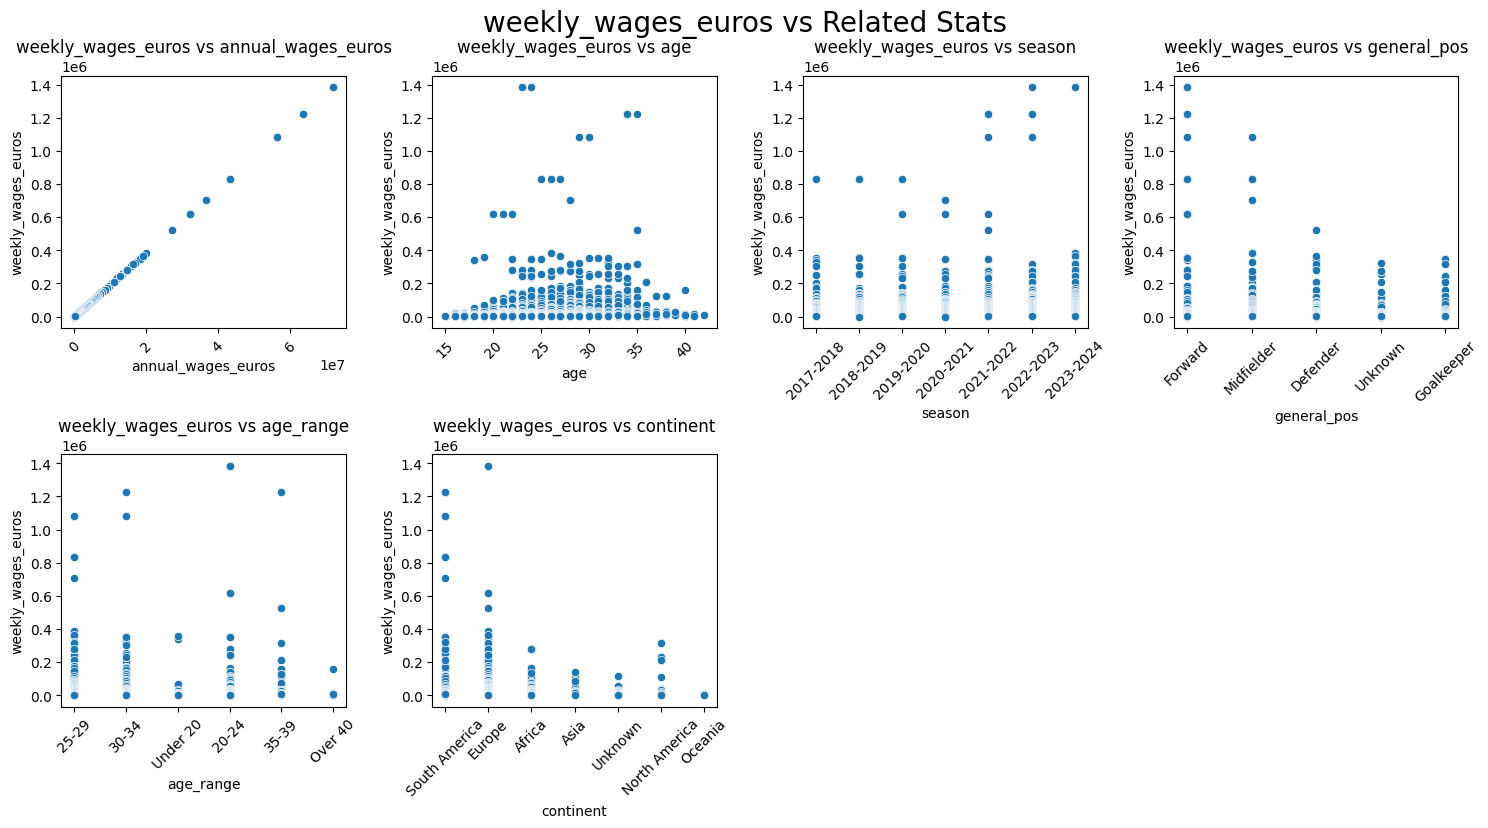

In [8]:
stat_plots.relationships(
    y="weekly_wages_euros",
    X=["annual_wages_euros", "age", "season", "general_pos", "age_range", "continent"],
)

In [9]:
wage_plots = WagesVisuals(df)

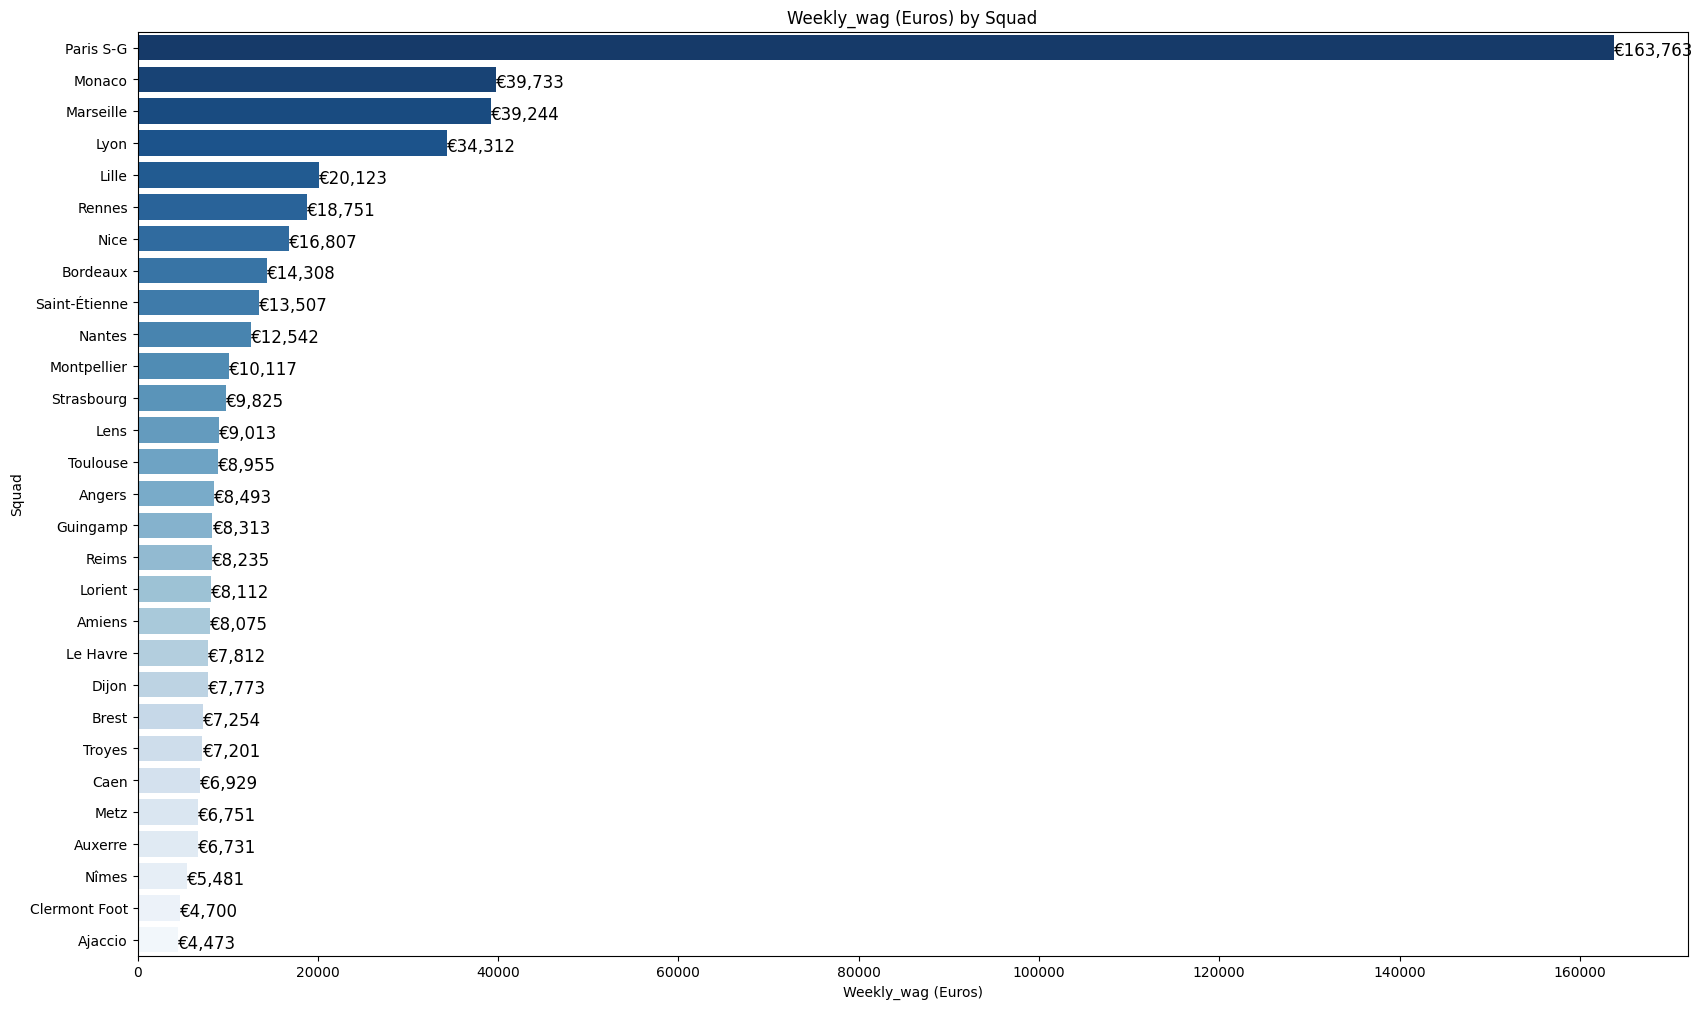

In [10]:
wage_plots.total_wage_avgs('squad')

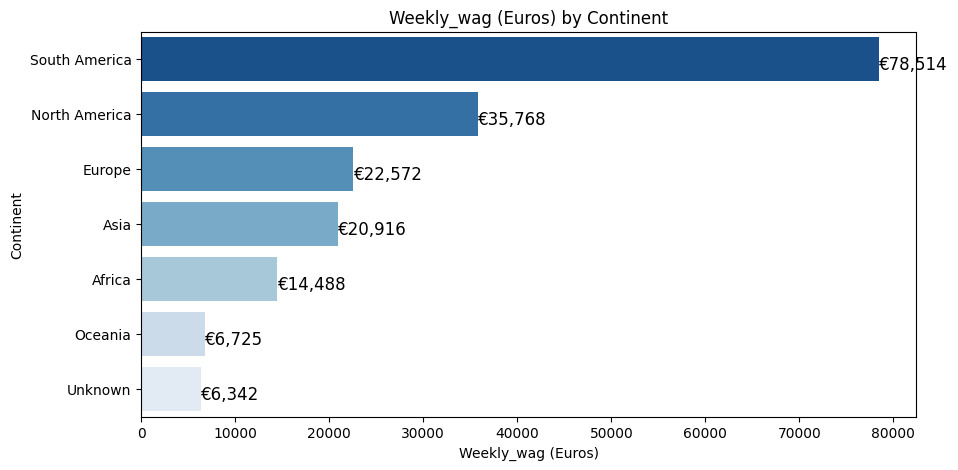

In [11]:
wage_plots.total_wage_avgs('continent', figsize=(10, 5))

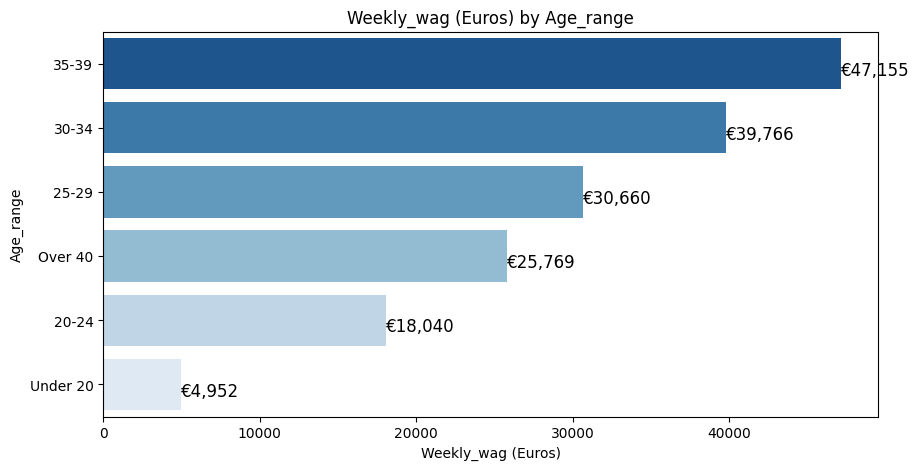

In [12]:
wage_plots.total_wage_avgs('age_range', figsize=(10, 5))

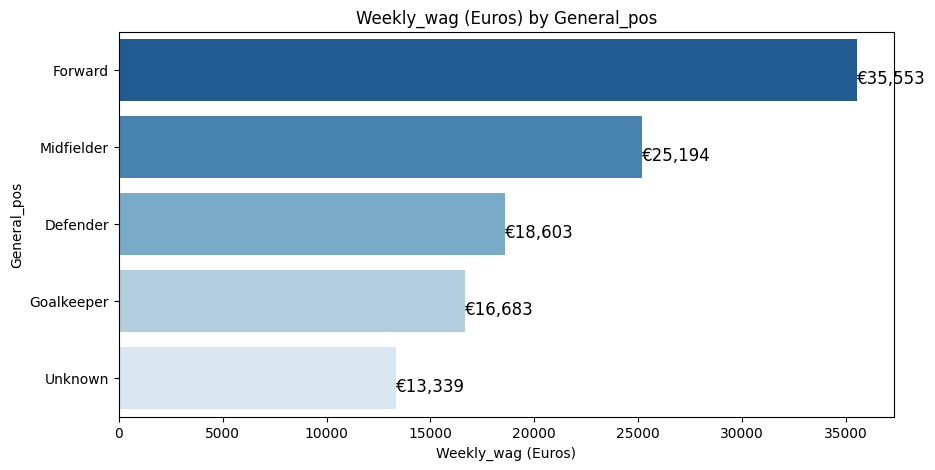

In [13]:
wage_plots.total_wage_avgs('general_pos', figsize=(10, 5))

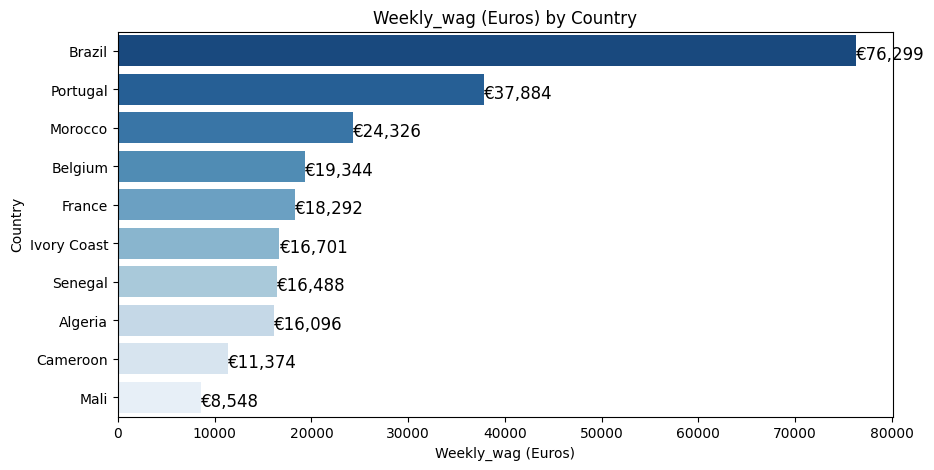

In [14]:
wage_plots.total_wage_avgs('country', figsize=(10, 5))

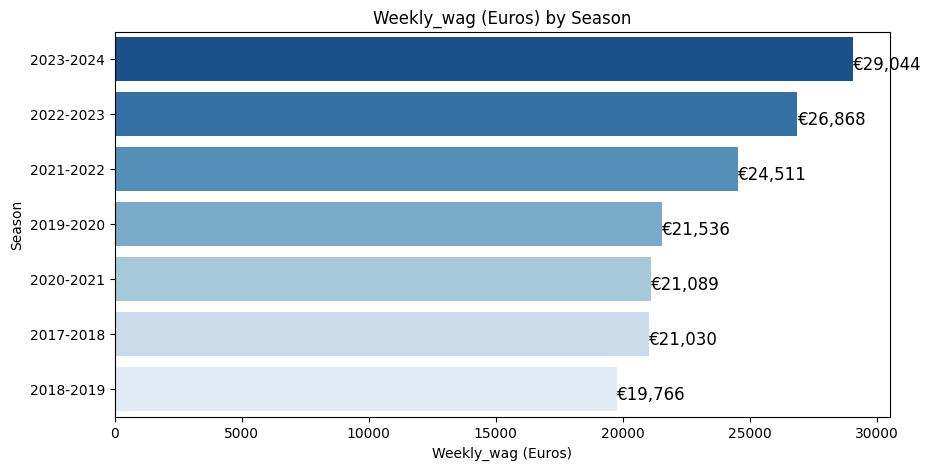

In [15]:
wage_plots.total_wage_avgs('season', figsize=(10, 5))

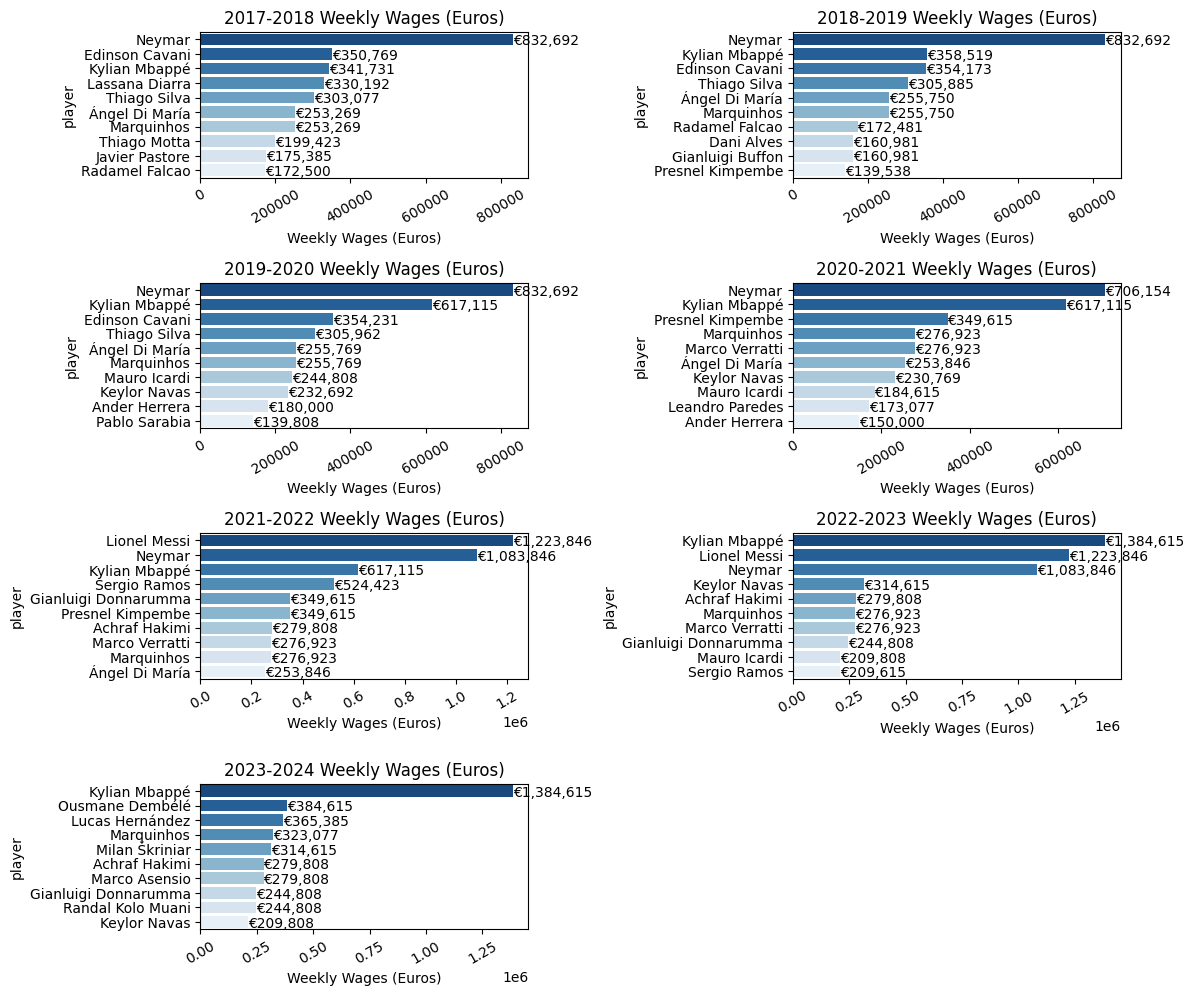

In [16]:
wage_plots.top_earners()

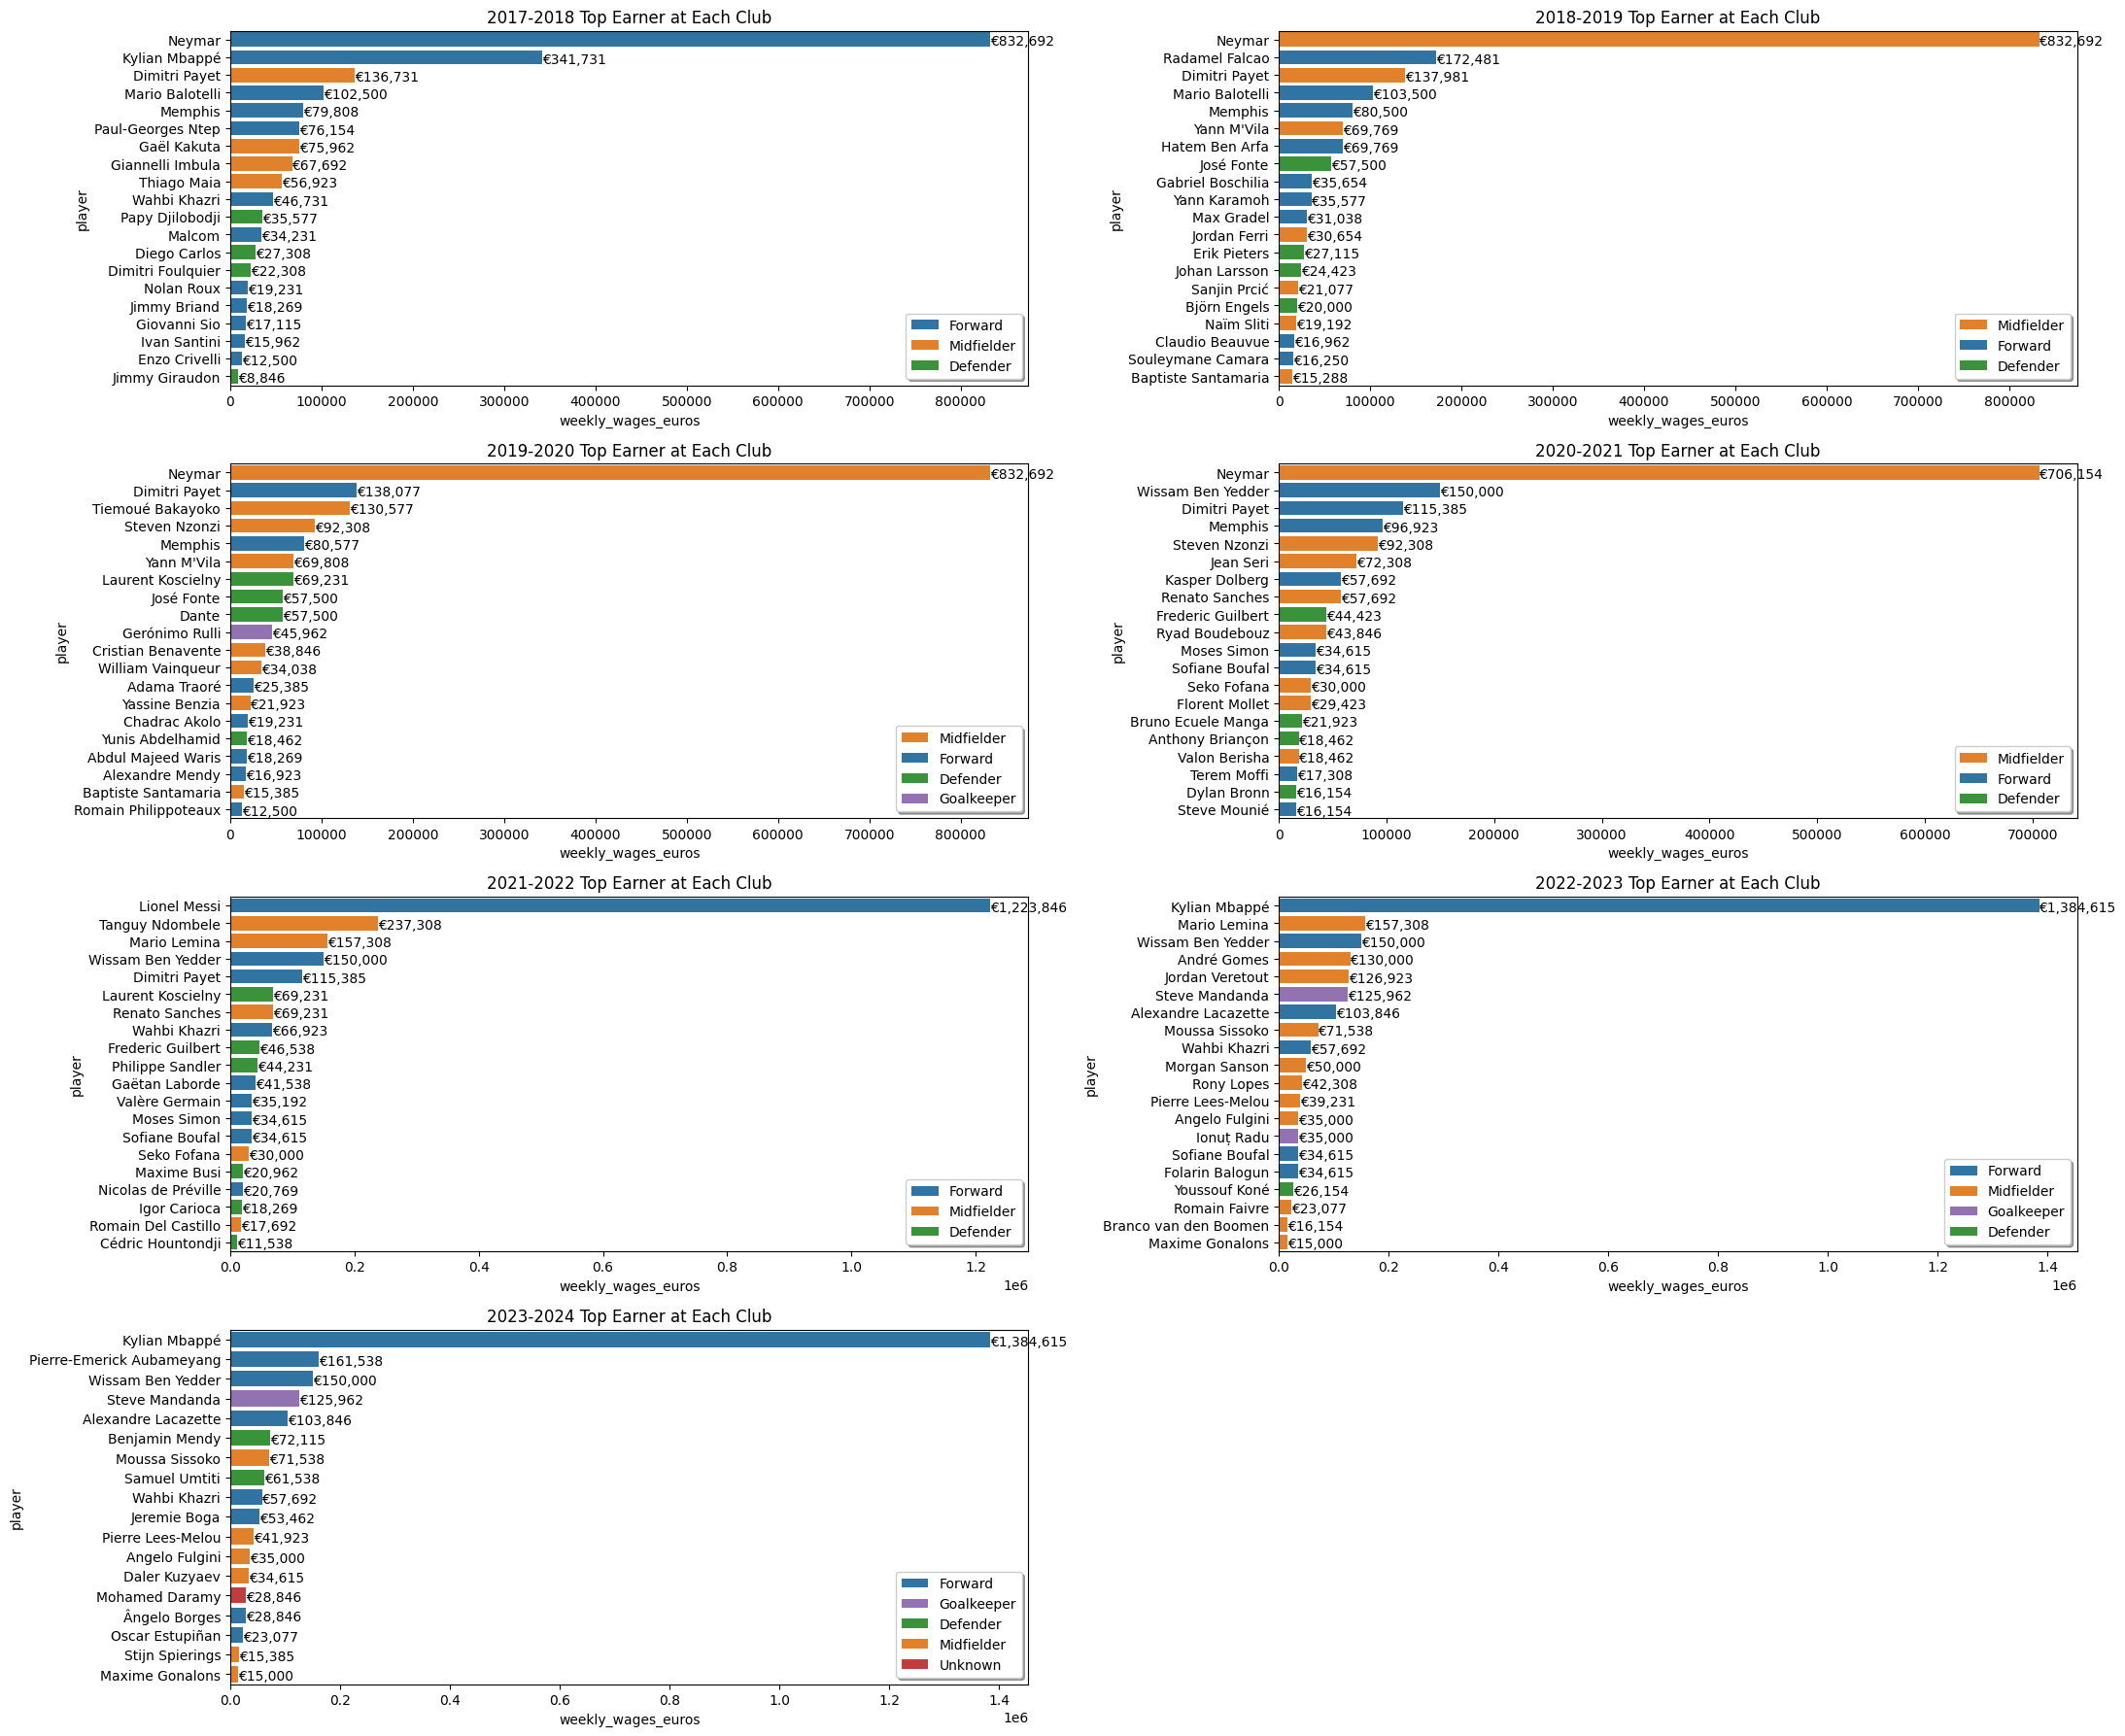

In [17]:
wage_plots.top_earners_season_var(hue='general_pos', yaxis_var='player')

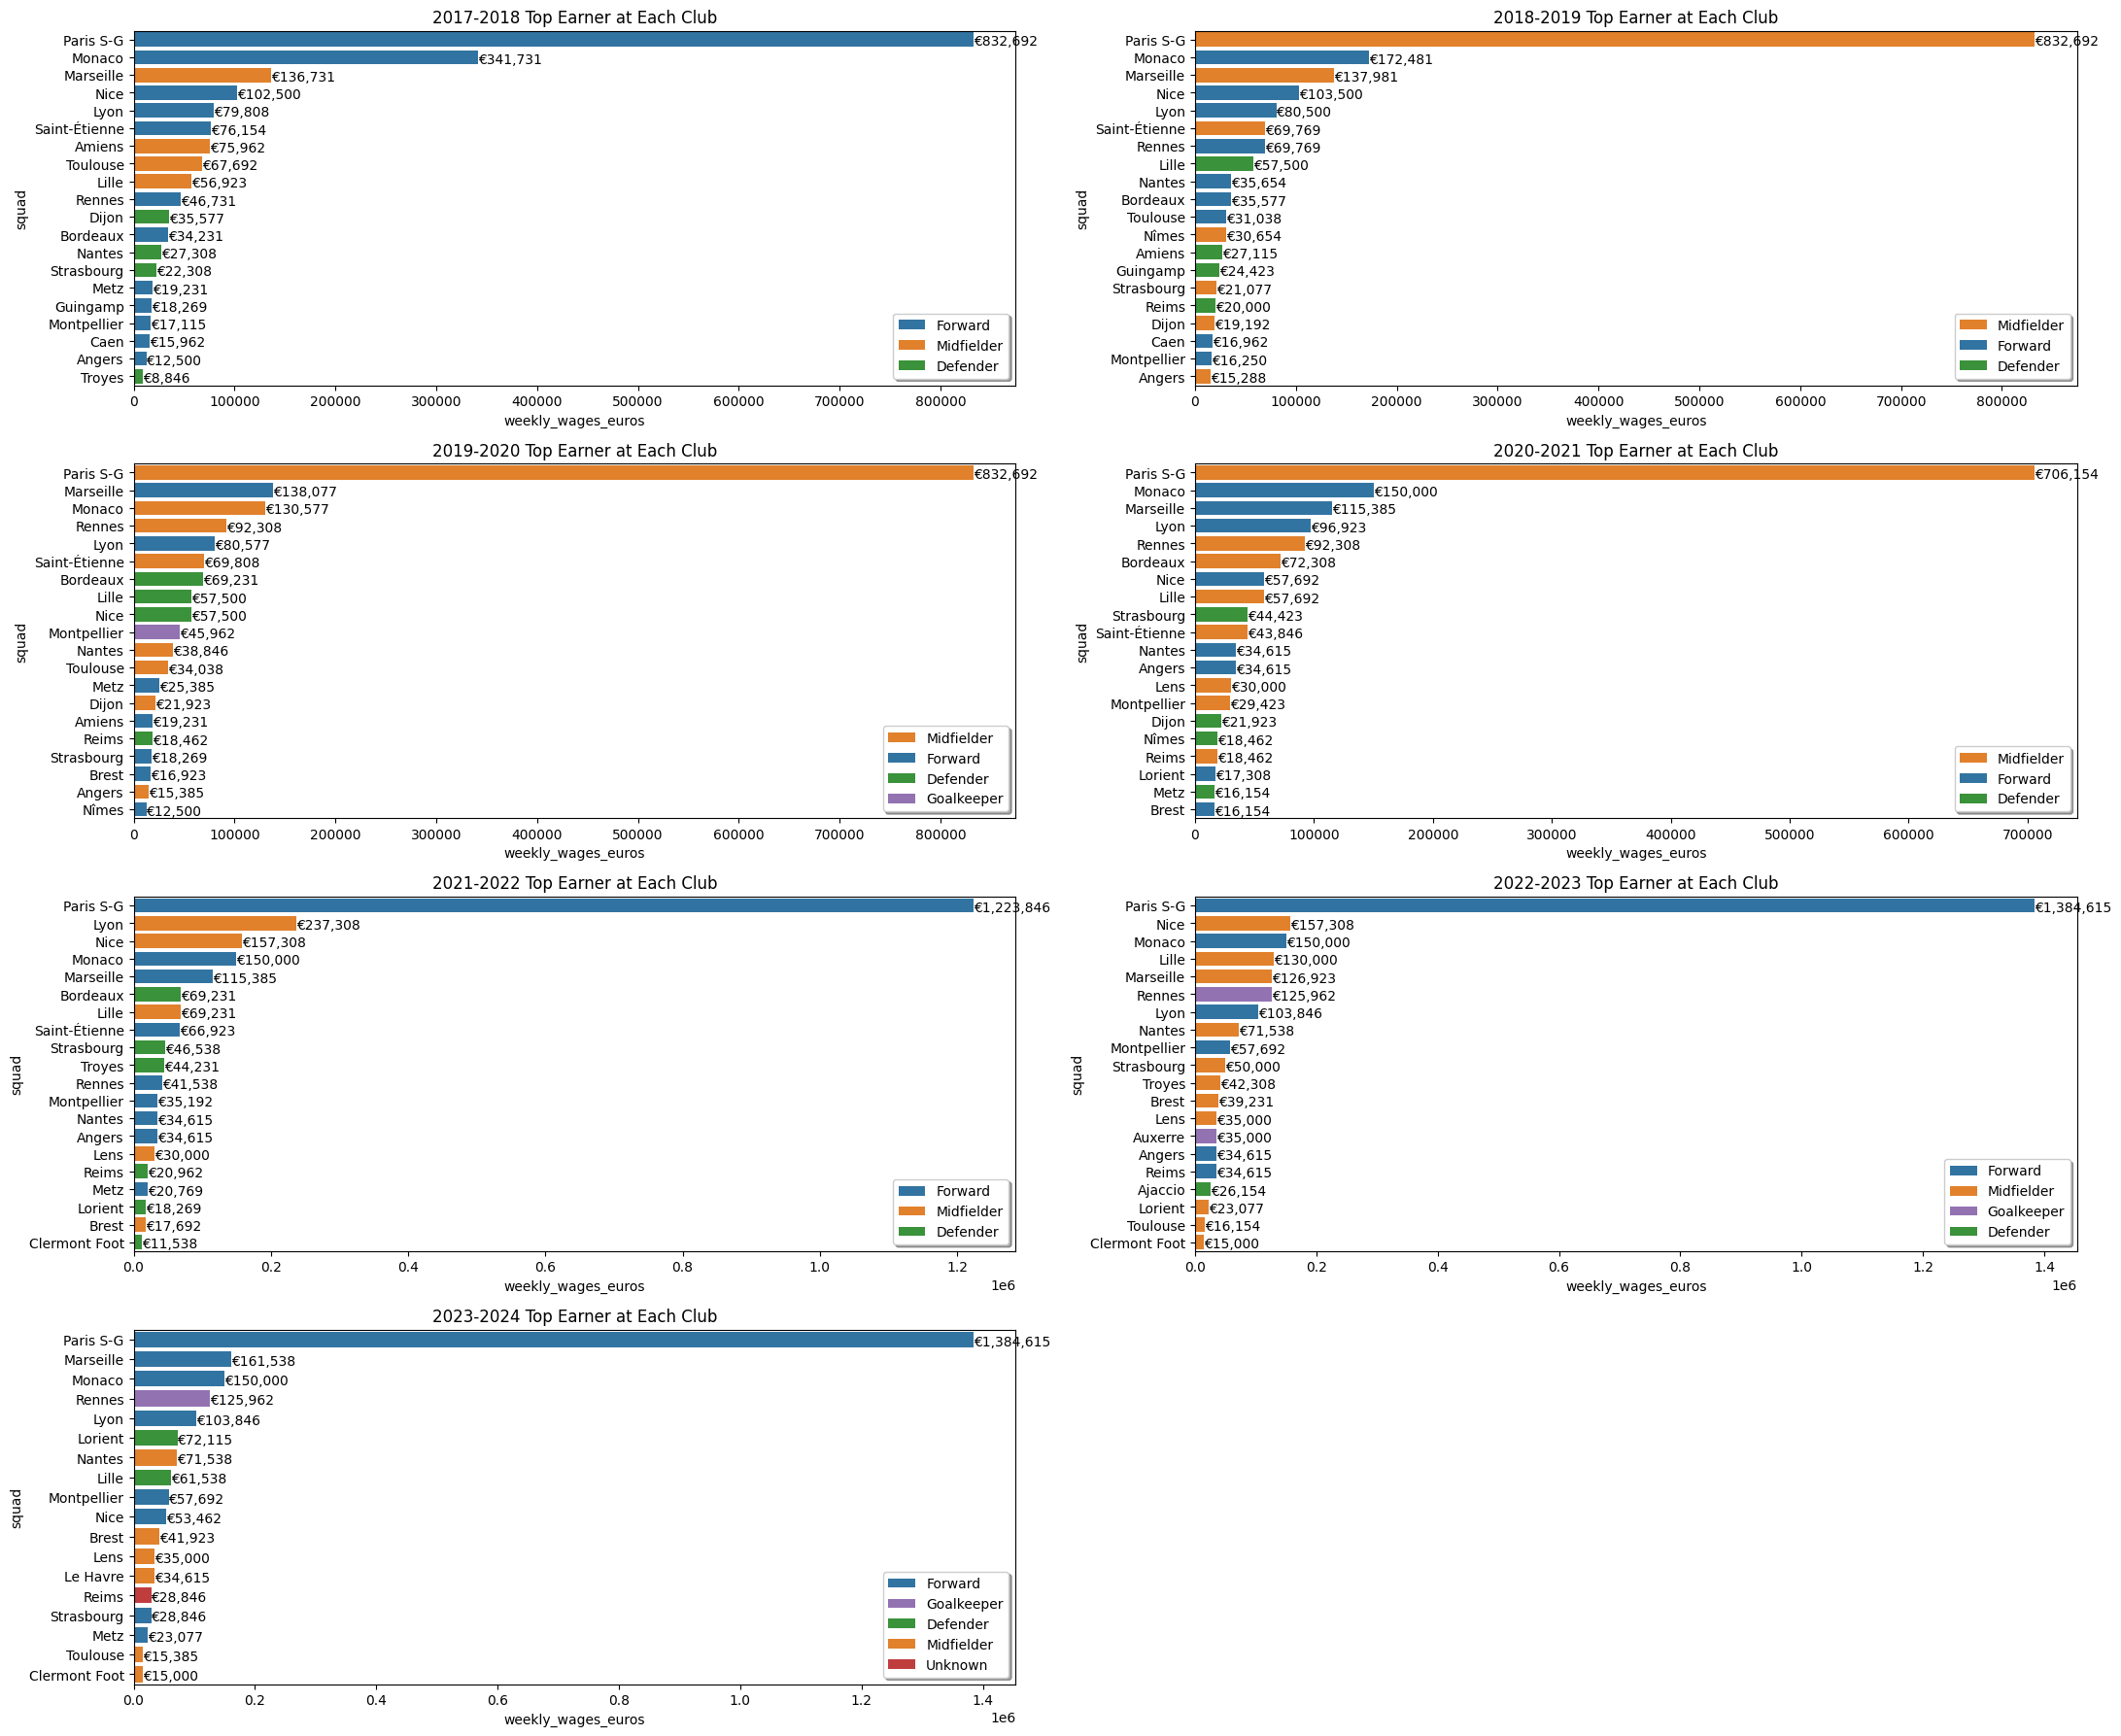

In [18]:
wage_plots.top_earners_season_var(hue='general_pos', yaxis_var='squad')

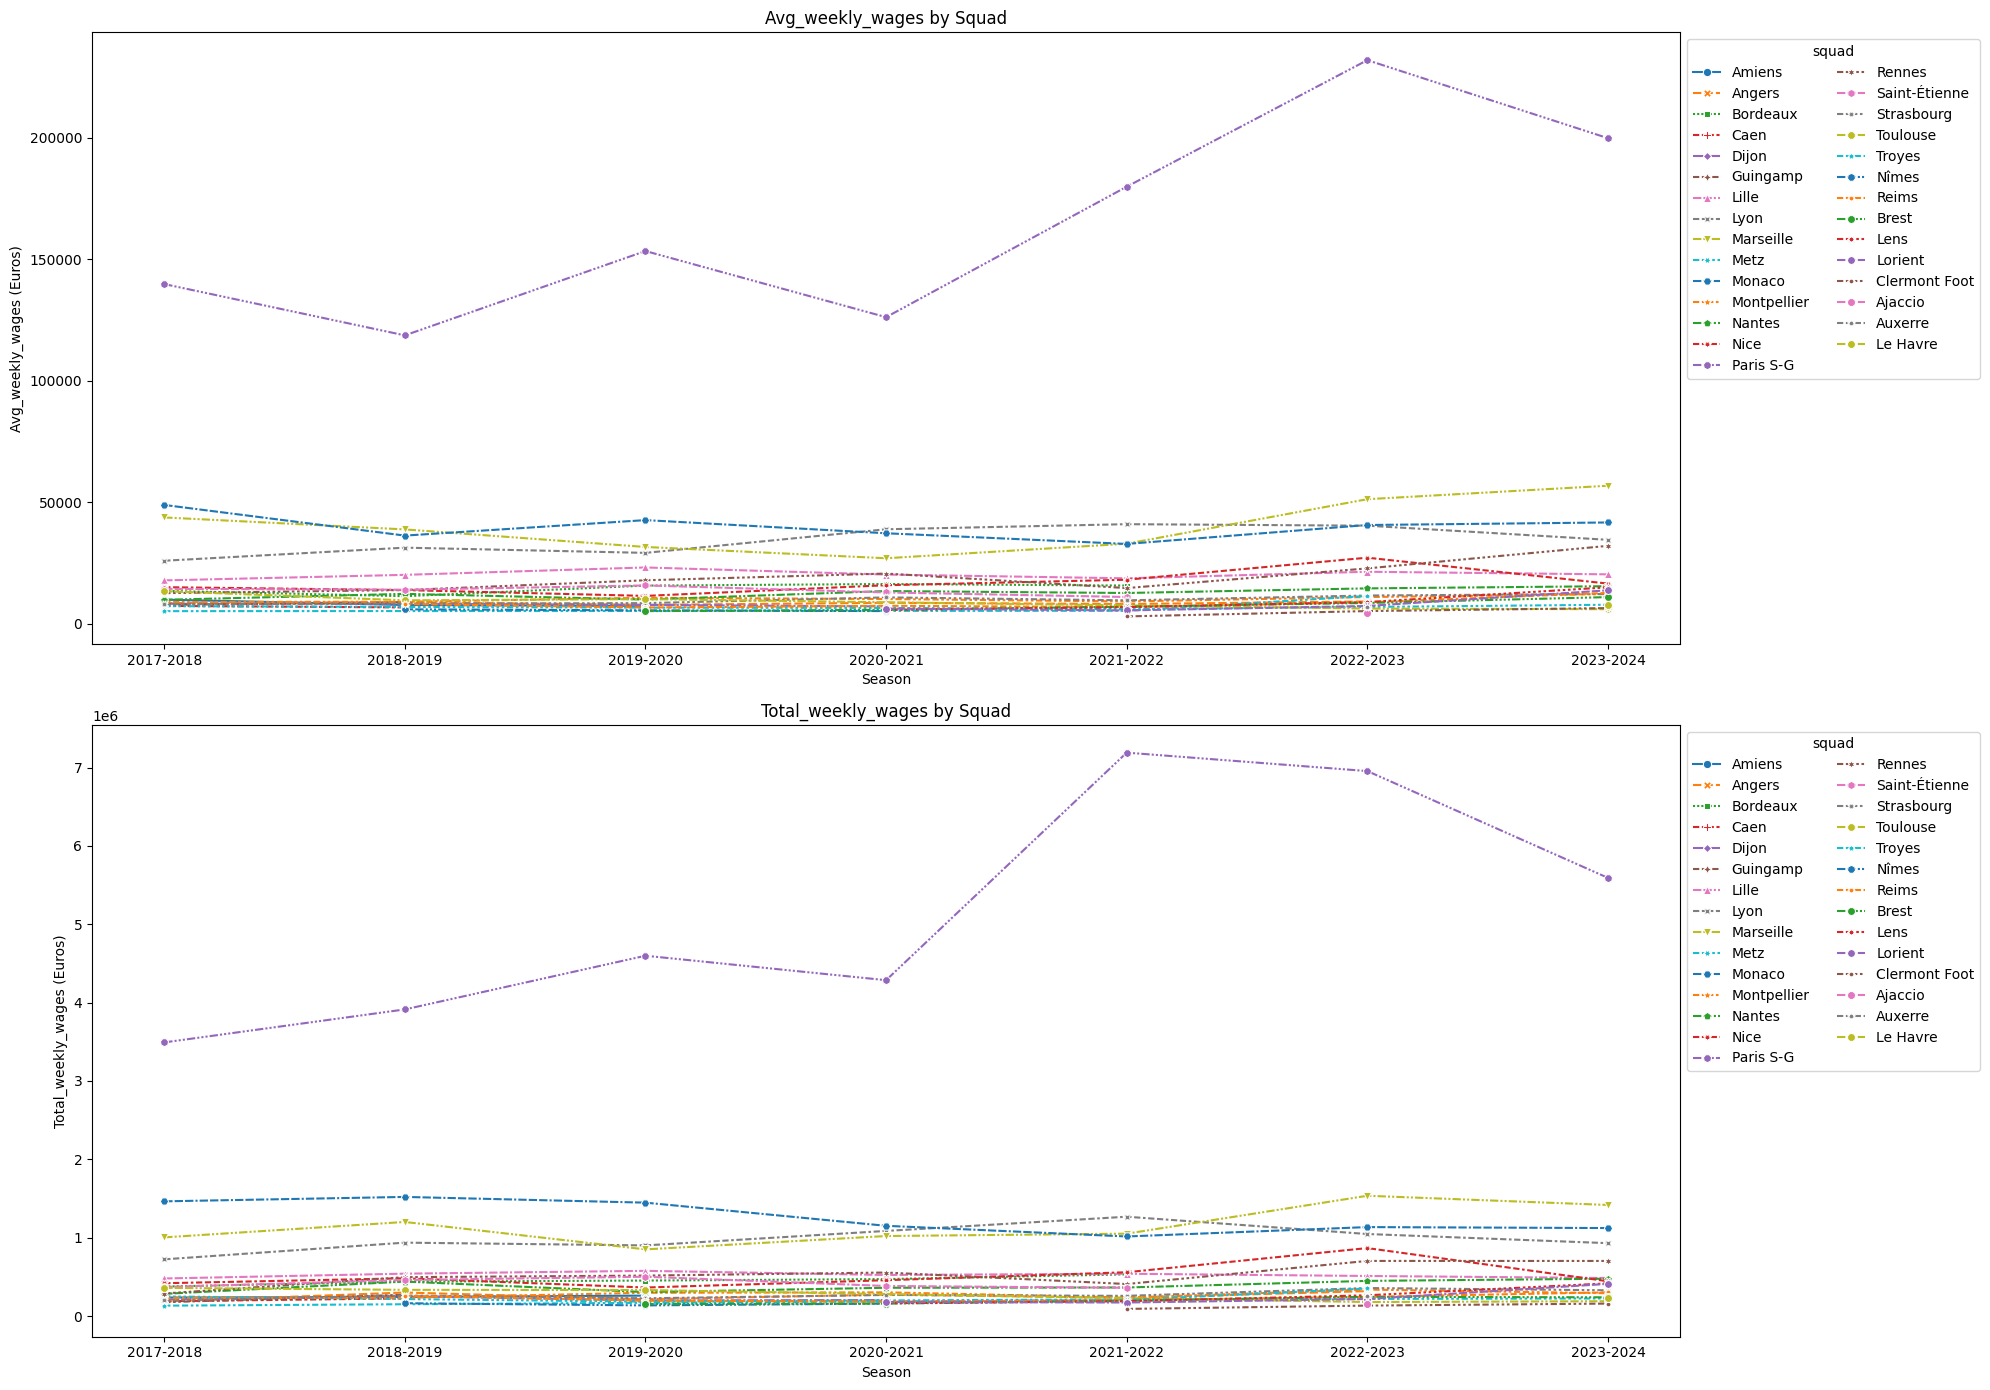

In [19]:
wage_plots.time_series('squad', figsize=(20,14))

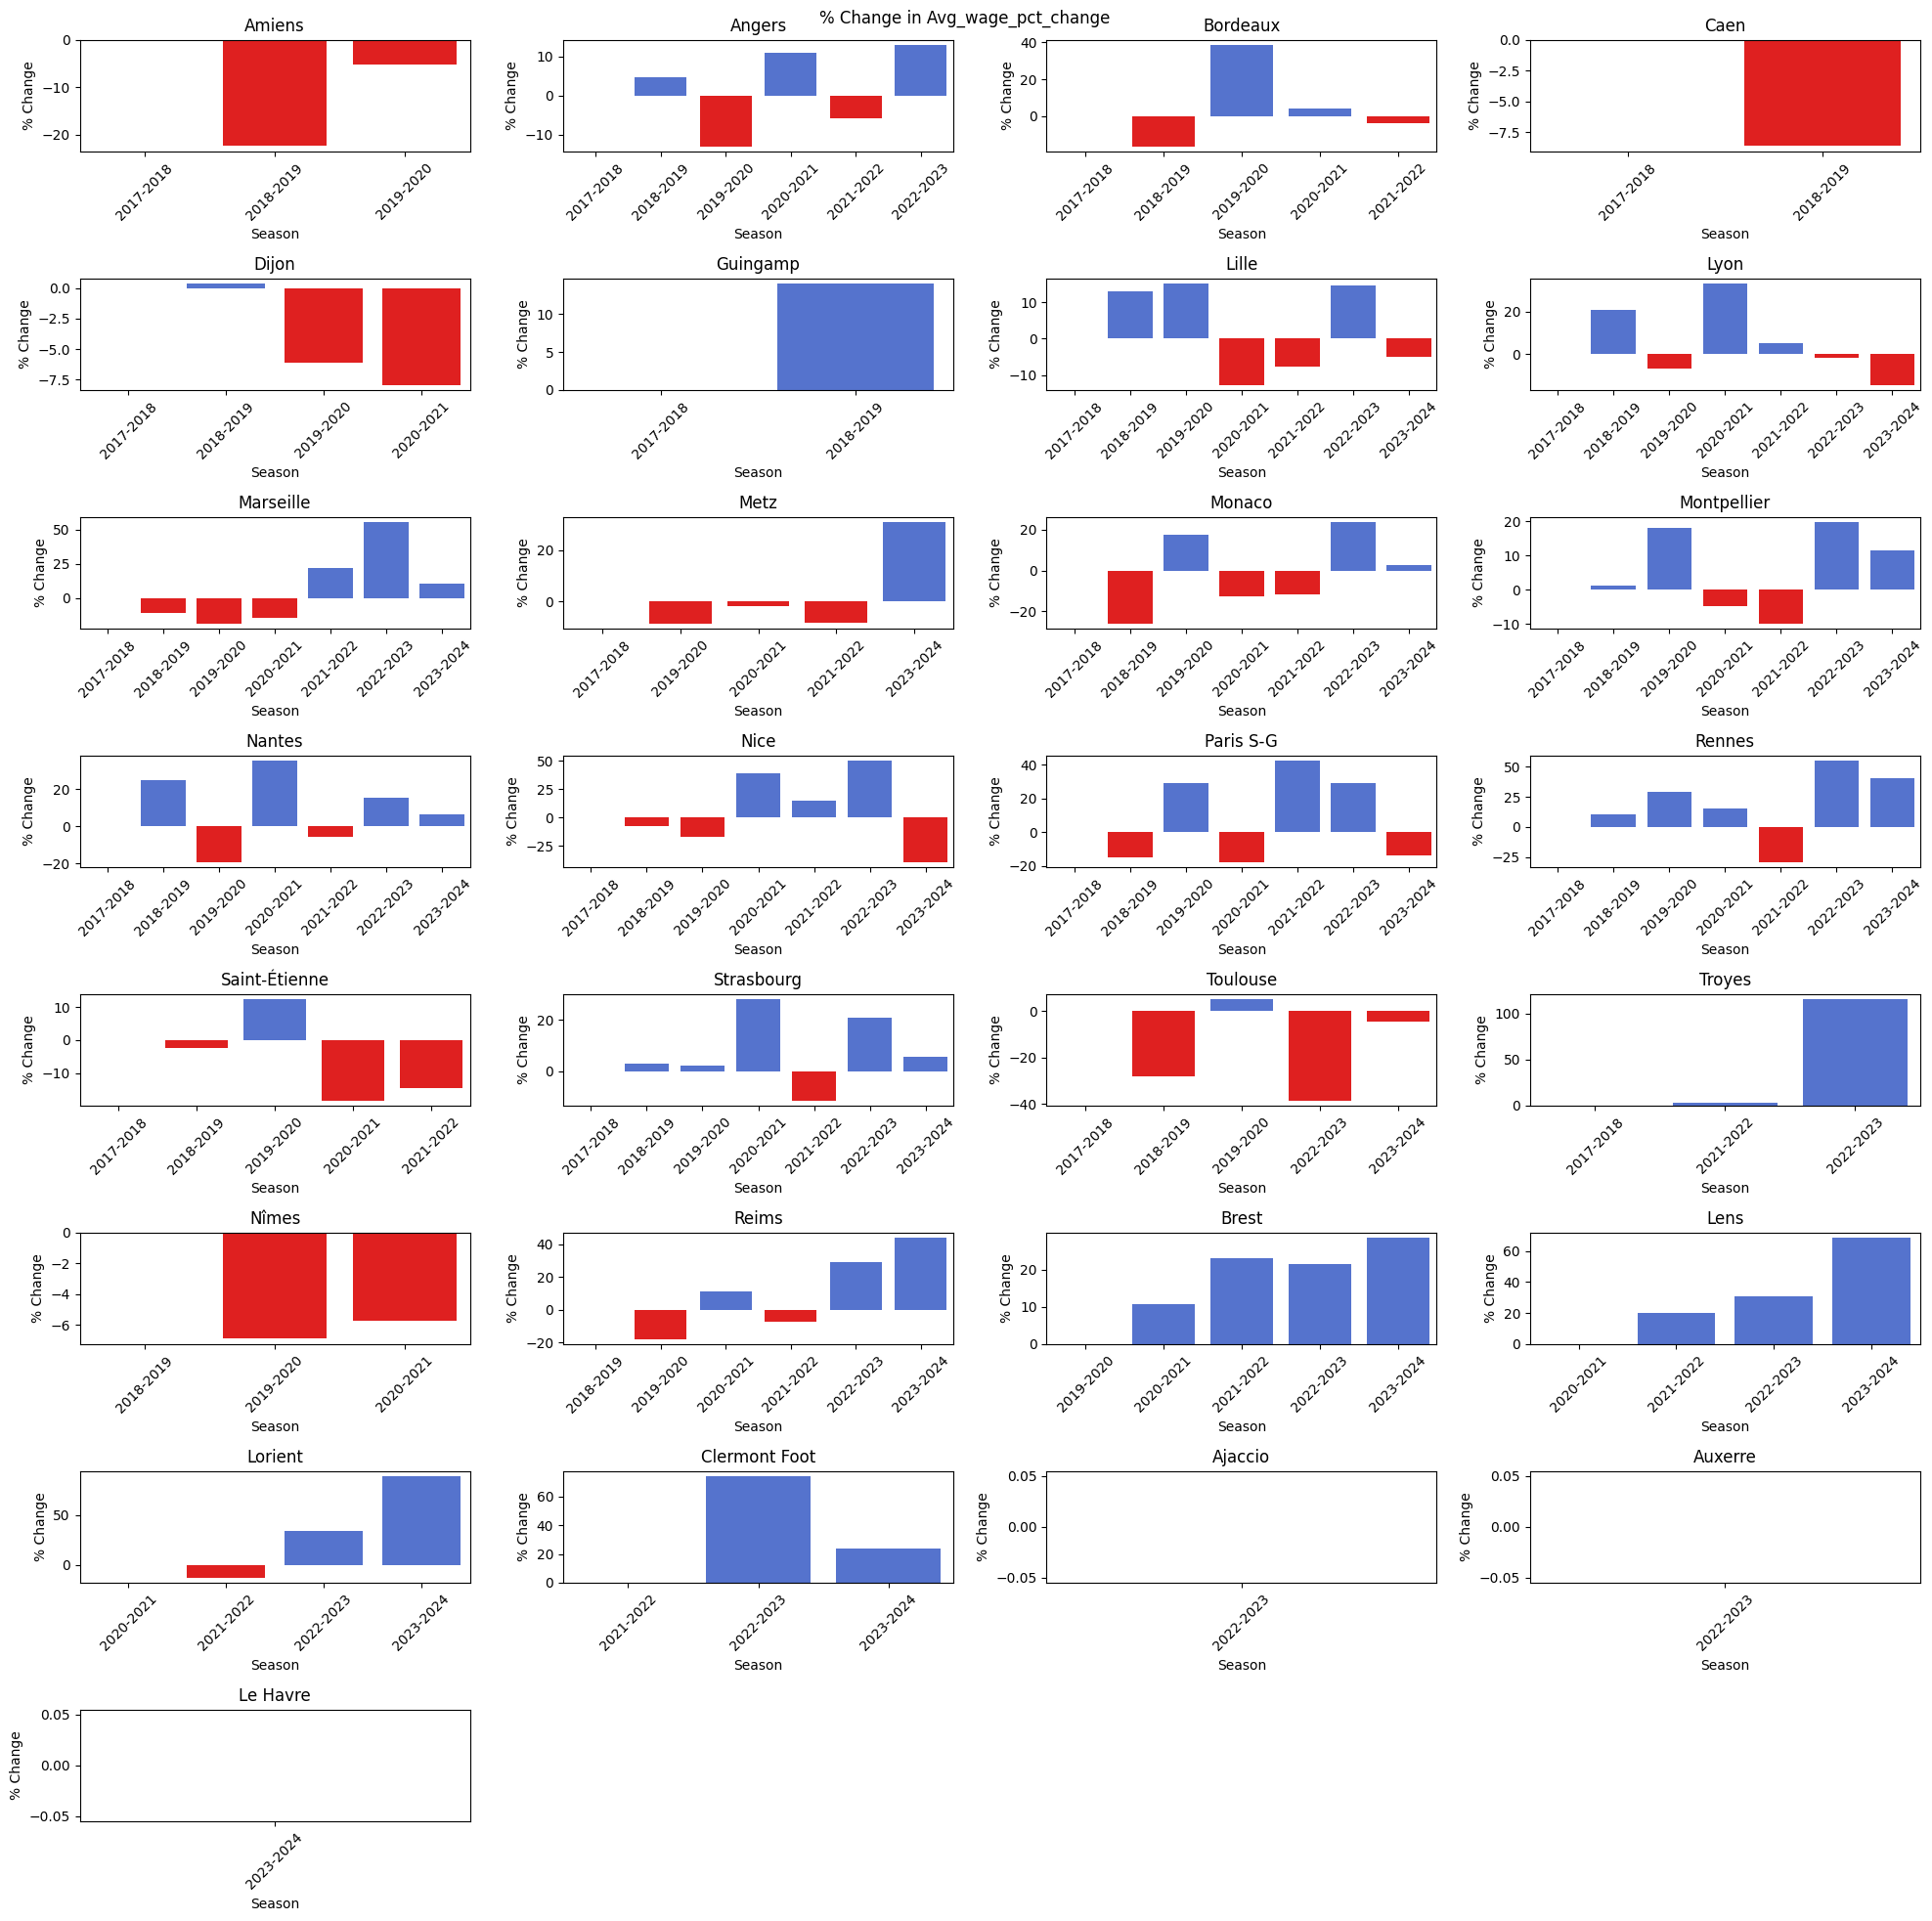

In [20]:
wage_plots.pct_change_plots('avg_wage_pct_change')

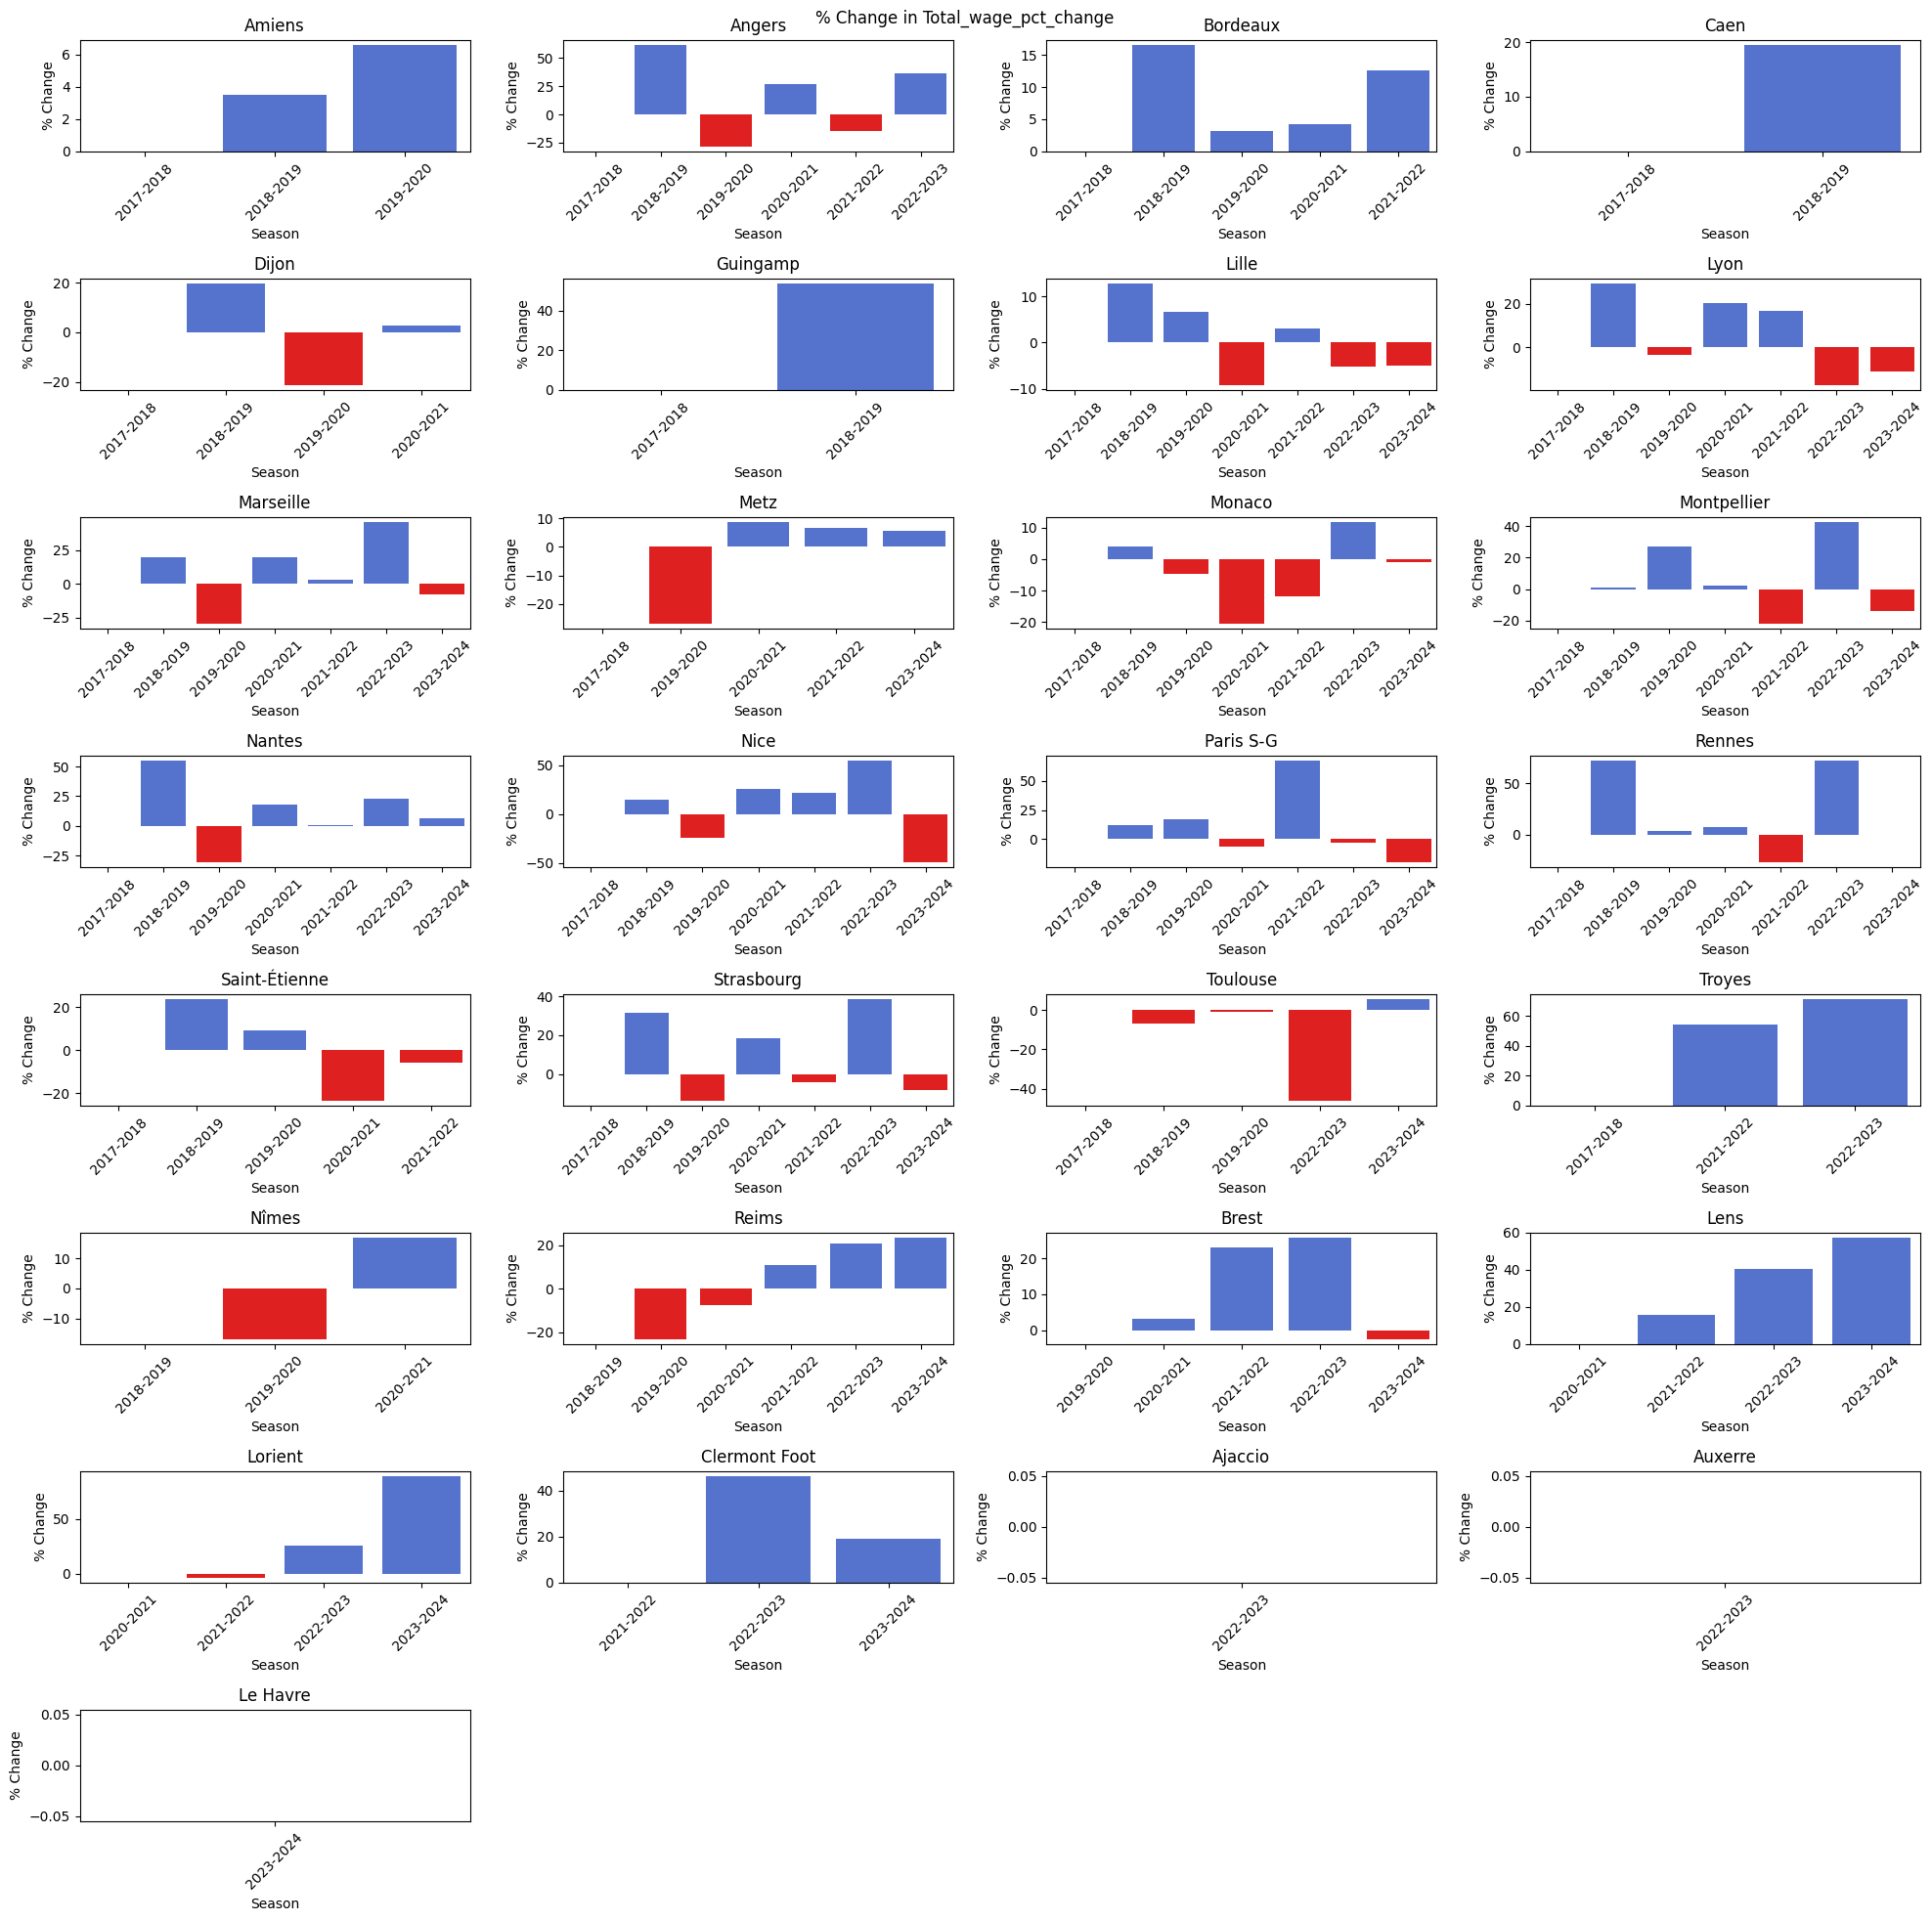

In [21]:
wage_plots.pct_change_plots('total_wage_pct_change')